__Machine Learning applied to Shipbuilding Market Analysis__

*Technical Univeristy of Denmark (DTU) - s182244 - MIT License*

__Imports__

In [1]:
from utilities import *
from framework import Splitter, Selector, Baseline, Model, CrossValidation
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
ts = load_data('data/ts_std.csv')

Loaded: 852 samples x 72 features


__Short-Term Demand Forecasting__

In [2]:
X_mask = (indicators.Type == 'Economy') | (indicators.Type == 'Demand')
idX_train = pd.period_range(start='2017-01', end='2018-12', freq='M')
idX_test  = pd.period_range(start='2019-01', end='2020-12', freq='M')

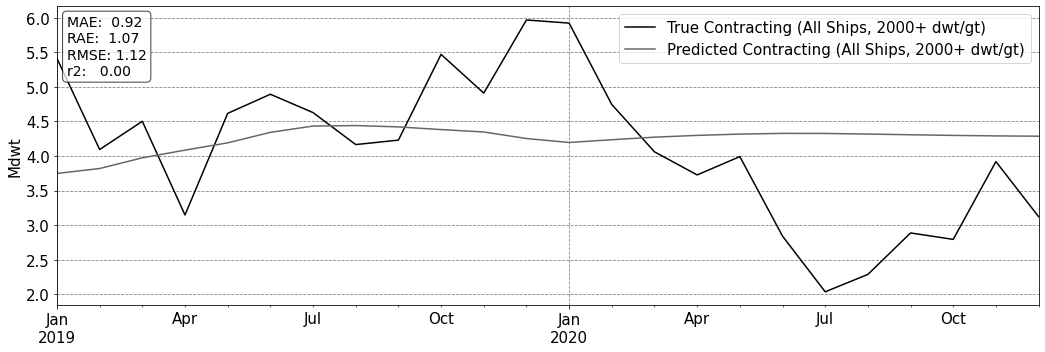

In [3]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, Baseline()) 
model.set_params(**{'X_selector__s':6, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':3})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns) 
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/b-short-demand.pdf')

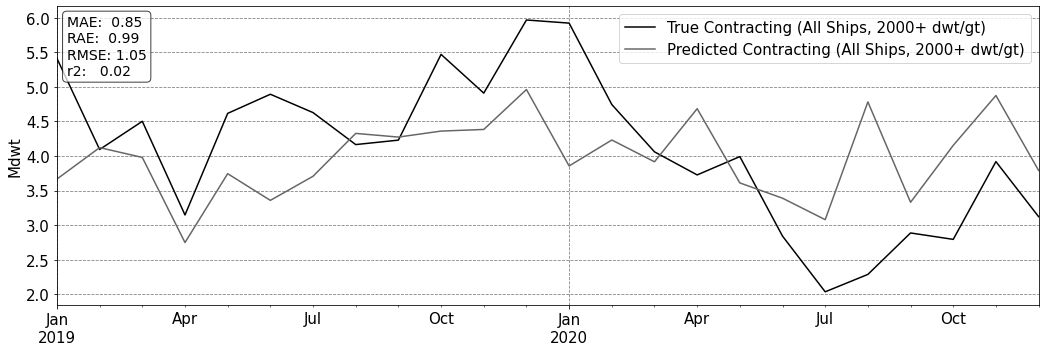

In [4]:
X_selector = Selector(ts[indicators[X_mask].ID.apply(str)].copy())
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, LinearRegression()) 
model.set_params(**{'X_selector__s':0, 'X_selector__d':1, 'X_selector__w': 36})
model.set_params(**{'y_selector__s':3})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns) 
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/lr-short-demand.pdf')

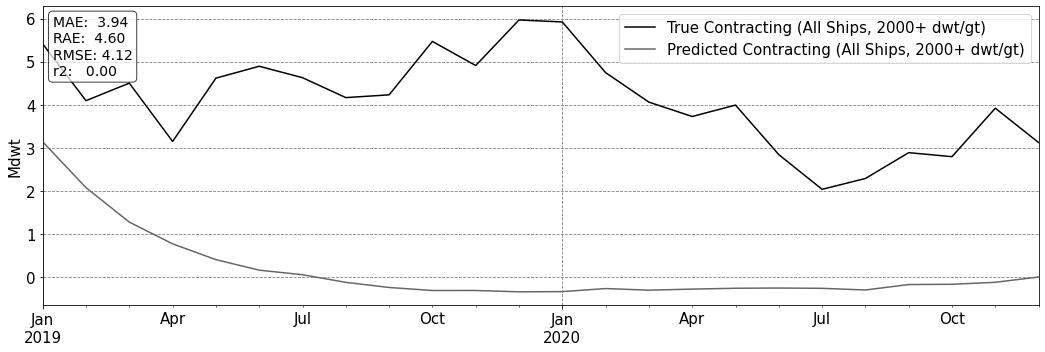

In [5]:
X_selector = Selector(ts[indicators[X_mask].ID.apply(str)].copy())
y_selector = Selector(ts[['999999']].copy())
estimator = MLPRegressor(max_iter=200)
model = Model(X_selector, y_selector, estimator) 
model.set_params(**{'X_selector__s':9, 'X_selector__d':6, 'X_selector__w': 36})
model.set_params(**{'y_selector__s':3})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns) 
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/nn-short-demand.pdf')

__Medium-Term Demand Forecasting__

In [6]:
idX_train = pd.period_range(start='2002-01', end='2009-12', freq='M')
idX_test  = pd.period_range(start='2010-01', end='2015-12', freq='M')

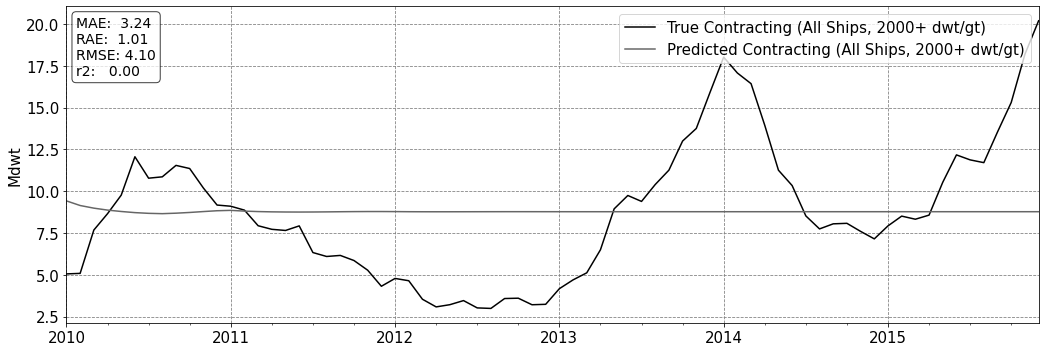

In [7]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, Baseline()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':6, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/b-med-demand.pdf')

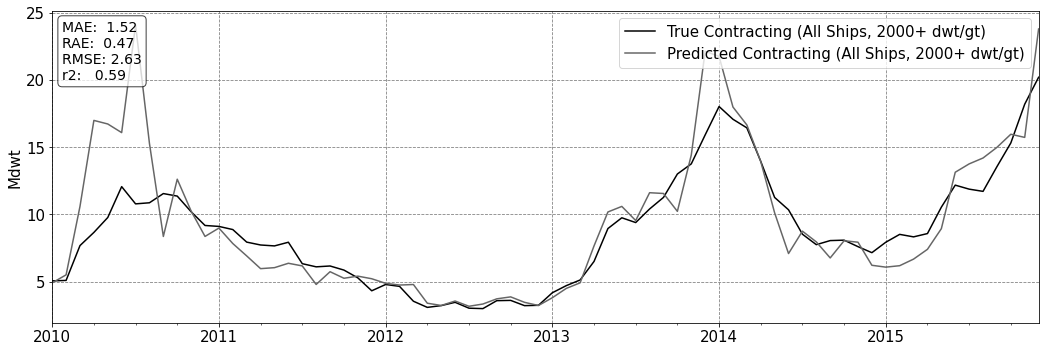

In [8]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, LinearRegression()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':6, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/lr-med-demand.pdf')

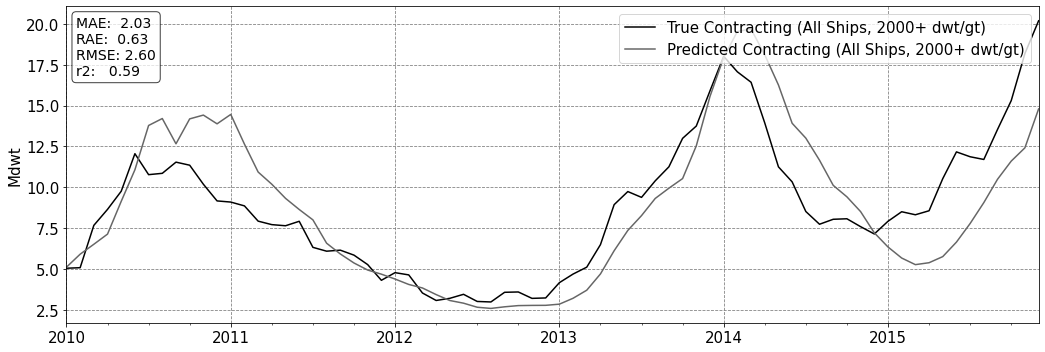

In [9]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, MLPRegressor()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':6, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/nn-med-demand.pdf')

__Long-Term Demand Forecasting__

In [10]:
idX_train = pd.period_range(start='2000-01', end='2009-12', freq='M')
idX_test  = pd.period_range(start='2010-01', end='2020-12', freq='M')

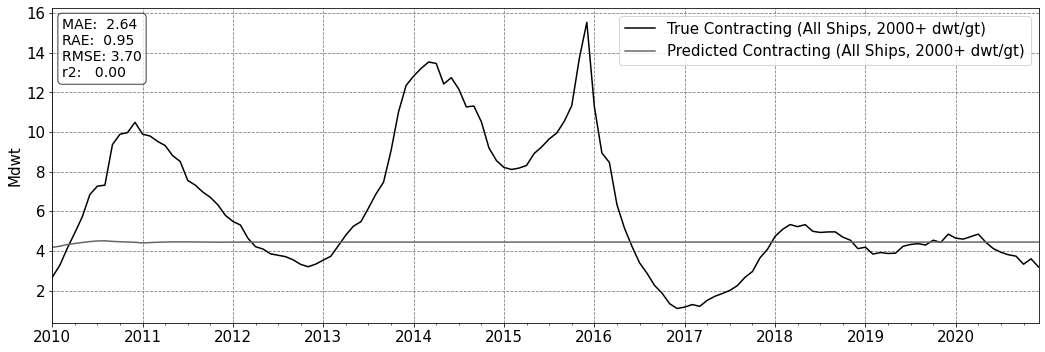

In [11]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, Baseline()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':12, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/b-long-demand.pdf')

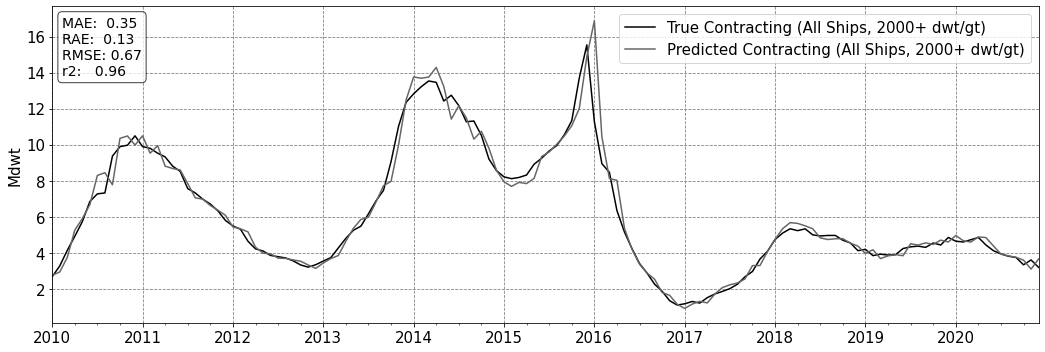

In [12]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, LinearRegression()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':12, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/lr-long-demand.pdf')

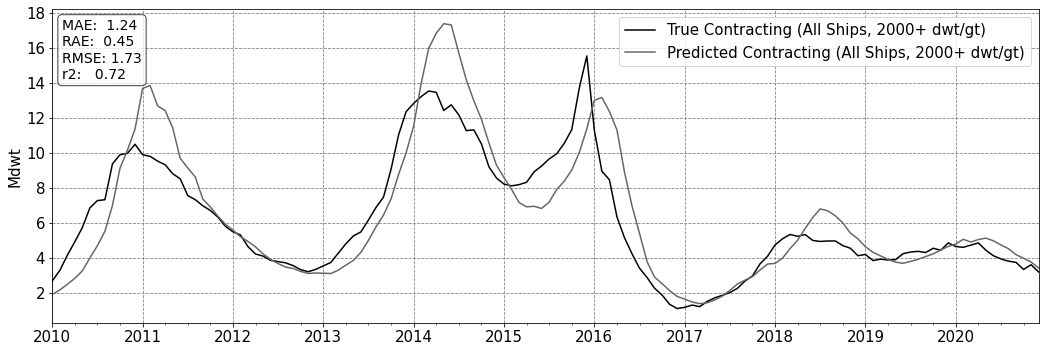

In [13]:
X_selector = Selector(ts[['999999']].copy()) #The baseline takes only y as inputs
y_selector = Selector(ts[['999999']].copy())
model = Model(X_selector, y_selector, MLPRegressor()) 
model.set_params(**{'X_selector__s':12, 'X_selector__d':0, 'X_selector__w': 12})
model.set_params(**{'y_selector__s':12, 'y_selector__d':0, 'y_selector__w': 0})
model.fit(idX_train)

y_true = model.y_selector.fit_transform(idX_test)
y_true = inverse_transform(y_true.reshape(-1), '999999', ts.columns)
y_pred = model.predict(idX_test)
y_pred = inverse_transform(y_pred.reshape(-1), '999999', ts.columns)
plot_pred(y_pred, idX_test, 999999, y_true, idX_test, show=True, save=path_fig+'demand/nn-long-demand.pdf')